Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [n]
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 19 seconds.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [n]
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 16 seconds.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [n]
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 16 seconds.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [n]
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 16 seconds.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [n]
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 15 seconds.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [n]
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 15 seconds.


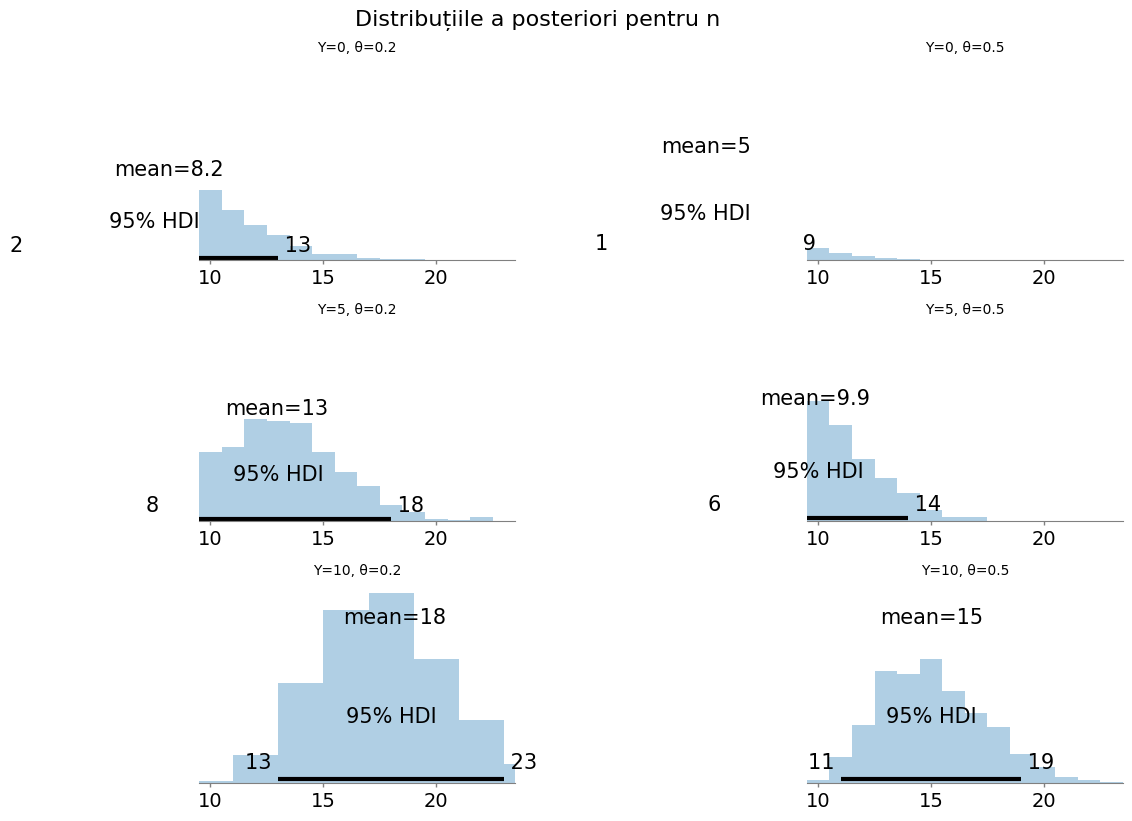

In [13]:
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

# valori pentru theta și Y
thetas = [0.2, 0.5]
ys = [0, 5, 10]  
trace_results = []

# pregatim figura pentru subplot-uri
num_plots = len(ys) * len(thetas)  # numarul total de combinatii
fig, axes = plt.subplots(len(ys), len(thetas), figsize=(12, 8), sharex=True, sharey=True)
axes = axes.flatten()

# iteram prin combinatiile de Y și theta
for idx, (y, theta) in enumerate([(y, theta) for y in ys for theta in thetas]):
    with pm.Model() as model:
        # distributia a priori pentru n
        n = pm.Poisson('n', mu=10)
        
        # distribuția binomiala pentru Y
        y_obs = pm.Binomial('y', n=n, p=theta, observed=y)
        
        # Esantionare
        trace = pm.sample(1000, return_inferencedata=True, progressbar=False)
        
        # salvam rezultatele pentru analiza ulterioara
        trace_results.append((y, theta, trace))
        
        # vizualizam distributia a posteriori în subplot
        az.plot_posterior(trace, var_names=['n'], hdi_prob=0.95, ax=axes[idx])
        axes[idx].set_title(f'Y={y}, θ={theta}', fontsize=10)

plt.tight_layout()
plt.suptitle("Distribuțiile a posteriori pentru n", fontsize=16, y=1.02)
plt.show()

Atunci cand Y creste(adica numarul de persoane care cumpara acel produs), iar theta scade(probabilitate ca o persoana sa cumpere acel produs), distributia posterioara se duce spre dreapta si creste, avand forma unei distributii normale. Y determina centrul distributiei a posteriori pentru n, theta determina latimea si concentrarea distributiei.